<a href="https://colab.research.google.com/github/FLinT3/SNParser/blob/main/leonov_v_d_home_project1_Vladislav_Leonov_chek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt


from os.path import join
from IPython import display
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score,  mutual_info_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
DATA_PATH = "data/"
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

### Задание 1. Подбираем лучшую иерархическую кластеризацию

5 баллов

Перед тем, как начинать работу с реальными данными, я предлагаю потренироваться работать с кластеризацией и поизучать различные гиперпараметры. На лекции были рассмотрены различные расстояния, которые могут служить метриками различия между объектами. Также мы разобрали несколько алгоритмов кластеризации, в том числе и иерархическую. Часто может быть непонятно, какой алгоритм и какую метрику расстояния нужно взять. Давайте упростим себе жизнь и напишем функцию `algorithm_selection`, которая будет на основании переданных ей:

* метрик расстояния (можно брать все, что было на лекциях, минимум 4)
* параметра `linkage` ('average', 'single', 'complete')
* и метрик качества кластеризации ('Homogeneity', 'Completeness', 'V-measure', 'Silhouette')

будет выводить итоговую таблицу, в которую войдут столбцы:
* distance (метрика расстояния)
* linkage (алгоритм иерархической кластеризации)
* homogenity
* completeness
* v_measure
* silhouette

В результате по этой таблице, нужно сделать вывод о том, какой алгоритм кластеризации и с какими гиперпараметрами лучше всего сработал.

Часть моментов мы не разбирали на лекции, поэтому вам нужно самим разобрать в них перед тем, как начинать делать данное задание.

Загрузим наши данные:

In [ ]:
data = load_digits()
X, y = data.data, data.target

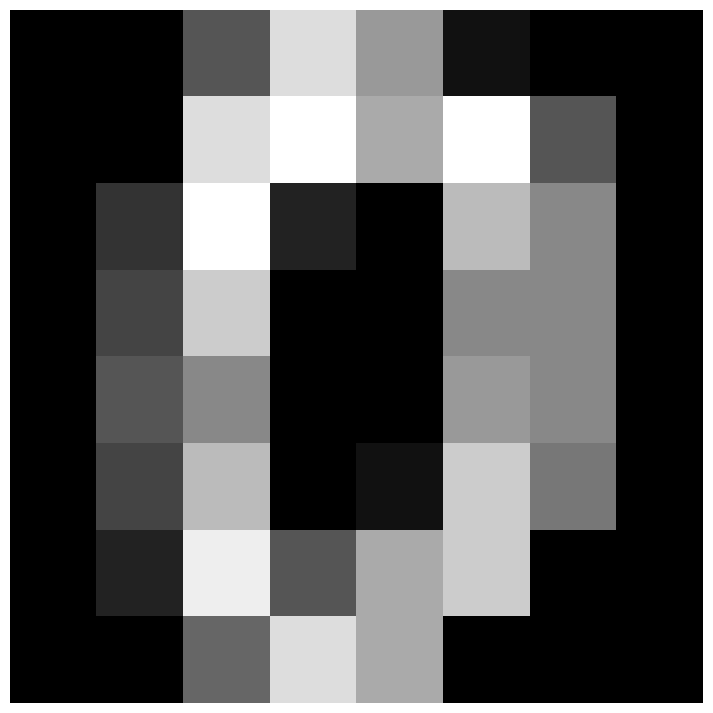

In [ ]:
plt.imshow(X[0].reshape(8, 8).astype(int), cmap="gray")
plt.axis("off");

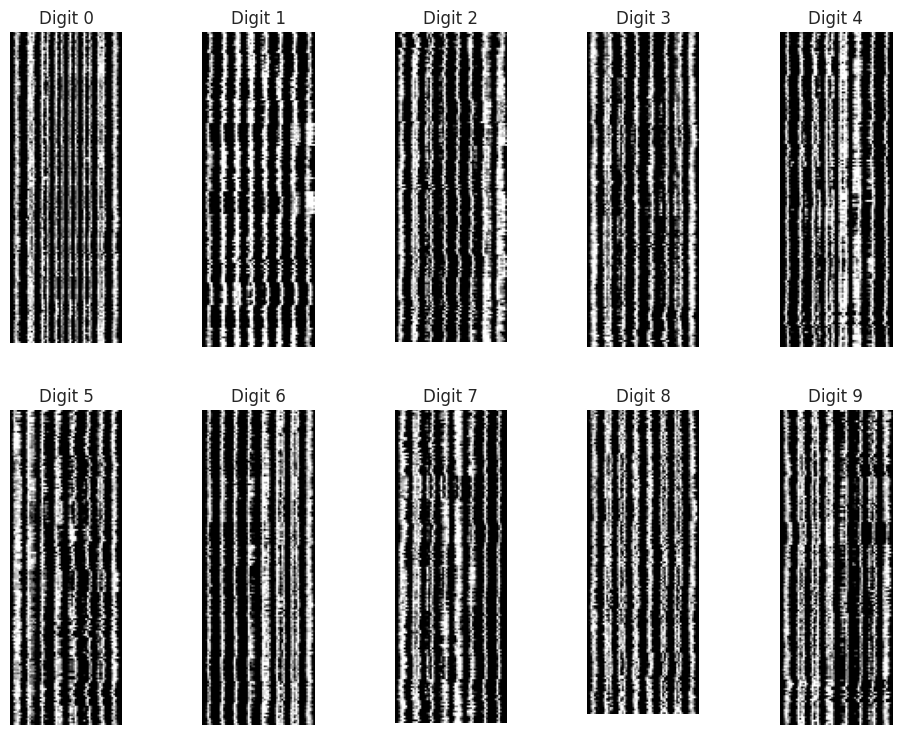

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

for i, dig in enumerate(np.unique(y)):
    axs.flatten()[i].imshow(X[list(np.where(y==dig))][0].astype(int), cmap='gray')
    axs.flatten()[i].set_title("Digit " + str(dig))
    axs.flatten()[i].axis("off")

Работать будем с изображениями рукописных цифр. Каждая картинка представлена вектором из 64 элементов (числа от 0 до 255). Чтобы ее нарисовать мы должны сделать `reshape` в картинку 8 на 8 пикселей. Вам нужно будет выбрать наилучший способ кластеризации при помощи функции `algorithm_selection`, которую вы реализуете. Для некоторых метрик кластеризации требуются метки **классов** объектов (они хранятся в переменной `y`). Укажите для каждого алгоритма число кластеров равное количеству классов в `y`.

In [ ]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering, AgglomerativeClustering

def algorithm_selection(X, distances, linkage, algorithms, evaluation_metrics):
    results = []
    for dist in distances:
        for link in linkage:
            for algo in algorithms:
                row = {'Distance': dist, 'Linkage': link, 'Algorithm': algo}
                if algo == 'KMeans':
                    model = KMeans(n_clusters=3)
                elif algo == 'AffinityPropagation':
                    model = AffinityPropagation()
                elif algo == 'SpectralClustering':
                    model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=5, assign_labels='kmeans')
                elif algo == 'AgglomerativeClustering':
                    model = AgglomerativeClustering(n_clusters=3, affinity=dist, linkage=link)
                else:
                    raise ValueError('Unknown algorithm: {}'.format(algo))

                model.fit(X)

                for metric in evaluation_metrics:
                    if metric == 'Homogeneity':
                        row[metric] = metrics.homogeneity_score(y, model.labels_)
                    elif metric == 'Completeness':
                        row[metric] = metrics.completeness_score(y, model.labels_)
                    elif metric == 'V-measure':
                        row[metric] = metrics.v_measure_score(y, model.labels_)
                    elif metric == 'Silhouette':
                        row[metric] = metrics.silhouette_score(X, model.labels_)

                results.append(row)

    results = pd.DataFrame(results)

    return results

In [ ]:
data = load_digits()
X, y = data.data, data.target

distances = ['euclidean', 'manhattan']
algorithm = ['KMeans', 'AffinityPropagation', 'SpectralClustering', 'AgglomerativeClustering']
linkage = ['average', 'single', 'complete']

evaluation_metrics = ['Homogeneity', 'Completeness', 'V-measure', 'Silhouette'] # потерялся аргумент

result = algorithm_selection(X, distances, linkage, algorithm, evaluation_metrics)
print(result)

     Distance   Linkage                Algorithm  Homogeneity  Completeness  \
0   euclidean   average                   KMeans     0.297643      0.627935   
1   euclidean   average      AffinityPropagation     0.958917      0.486875   
2   euclidean   average       SpectralClustering     0.155001      0.893539   
3   euclidean   average  AgglomerativeClustering     0.029618      0.368547   
4   euclidean    single                   KMeans     0.299028      0.630838   
5   euclidean    single      AffinityPropagation     0.958929      0.486860   
6   euclidean    single       SpectralClustering     0.155001      0.893539   
7   euclidean    single  AgglomerativeClustering     0.001131      0.275514   
8   euclidean  complete                   KMeans     0.299188      0.631169   
9   euclidean  complete      AffinityPropagation     0.958919      0.486904   
10  euclidean  complete       SpectralClustering     0.155001      0.893539   
11  euclidean  complete  AgglomerativeClustering    

**✅** Хорошая таблица, 5/5. Только аргумент evaluation_metrics не задан.

### Задание 2. Аннотация клеточных типов

суммарно 10 баллов

В этом задании вам предстоит применять полученные знания о кластеризации для аннотации данных, полученных при помощи проточной цитометрии. Каждая строка в данных это одна клетка, столбцы **FSC-A**, **SSC-A** косвенным образом свидетельствуют о размере клеток, остальные показывают интенсивность флуоресценции различных поверхностных маркеров. Ваша задача определить для каждой клетки, к какому типу она относится.

#### 2.1. EDA

1.5 балла

Проведите EDA:

1. Посмотрите на данные (можно попробовать метод `describe`)
2. Сколько у нас клеток / признаков
3. Постройте распределения каждого признака (есть ли очевинные выбросы?)

In [ ]:
fc_data = pd.read_csv(join(DATA_PATH, "flow_c_data.csv"), index_col=0)

##### YOUR TURN TO CODE:

In [ ]:
fc_data.head(3)

FSC-A     SSC-A    HLA-DR       CD3      CD45      CD14      CD56  \
0  0.722199  0.154232  0.494449  0.512853  4.057328  1.019255  4.007273   
1  0.751073  0.114618  4.671924  0.822042  4.933149  0.159388 -0.216407   
2  1.108188  0.150011 -0.422857  4.006353  5.616384  0.519223  0.783077   

       CD19     CD11c  
0 -1.406912  0.384406  
1  6.034845  0.577039  
2 -0.318668 -0.493832

In [ ]:
fc_data.describe()

FSC-A         SSC-A        HLA-DR           CD3          CD45  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.962458      0.165415      1.791579      3.280391      5.169845   
std        0.500012      0.190773      2.027281      2.112079      0.518247   
min        0.144786      0.021657     -7.634172     -2.517639     -8.329666   
25%        0.798804      0.105550      0.275056      1.401943      4.922227   
50%        0.908574      0.130543      1.194313      4.373660      5.234119   
75%        1.052034      0.162536      3.696976      4.842212      5.481218   
max       42.954485     15.460997     12.946668     13.844391     13.710922   

               CD14          CD56          CD19         CD11c  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean       1.097182      0.412223      1.219683      0.569898  
std        1.375876      1.176967      2.285305      1.502445  
min       -8.833883    -12.358701     -9.640775    -11.085437  
25%        0.389746     -0.195978     -0.146948     -0.498781  
50%        0.672853      0.053267      0.244121      0.272297  
75%        1.065076      0.378576      0.908374      1.220576  
max        6.294236      6.461899      7.208721      6.840864

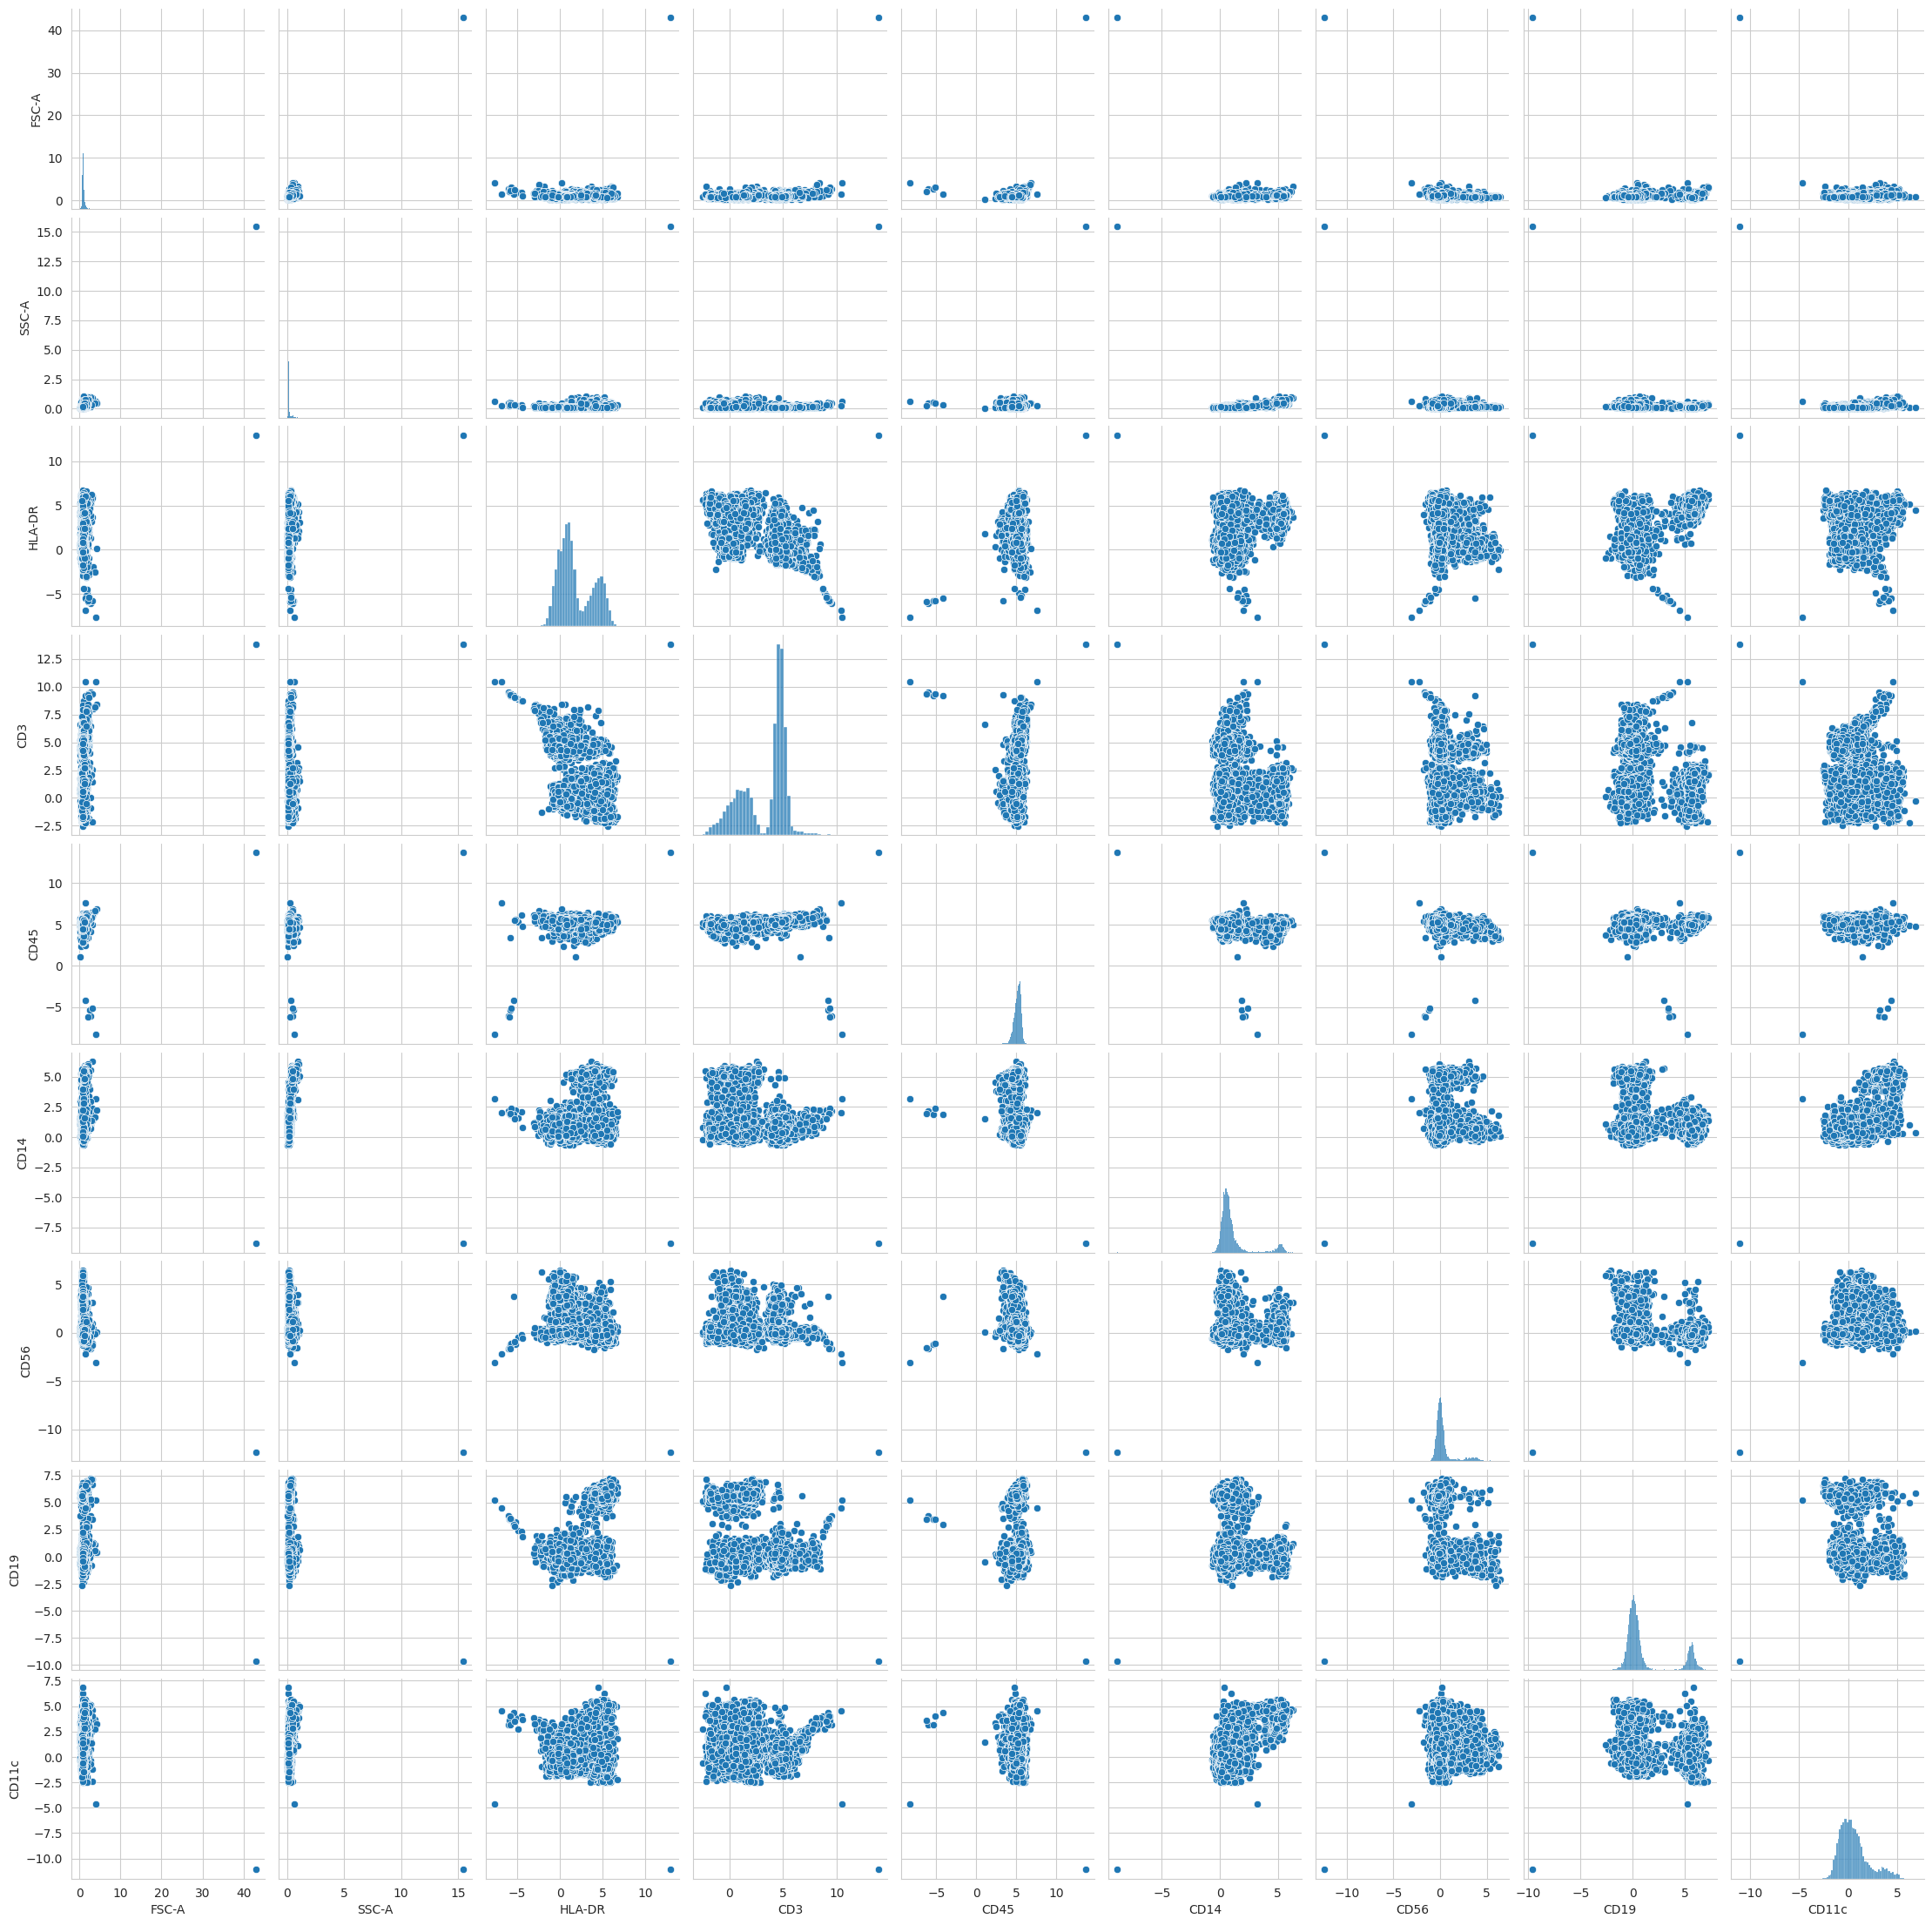

In [ ]:
import seaborn as sns

sns_plot = sns.pairplot(fc_data)


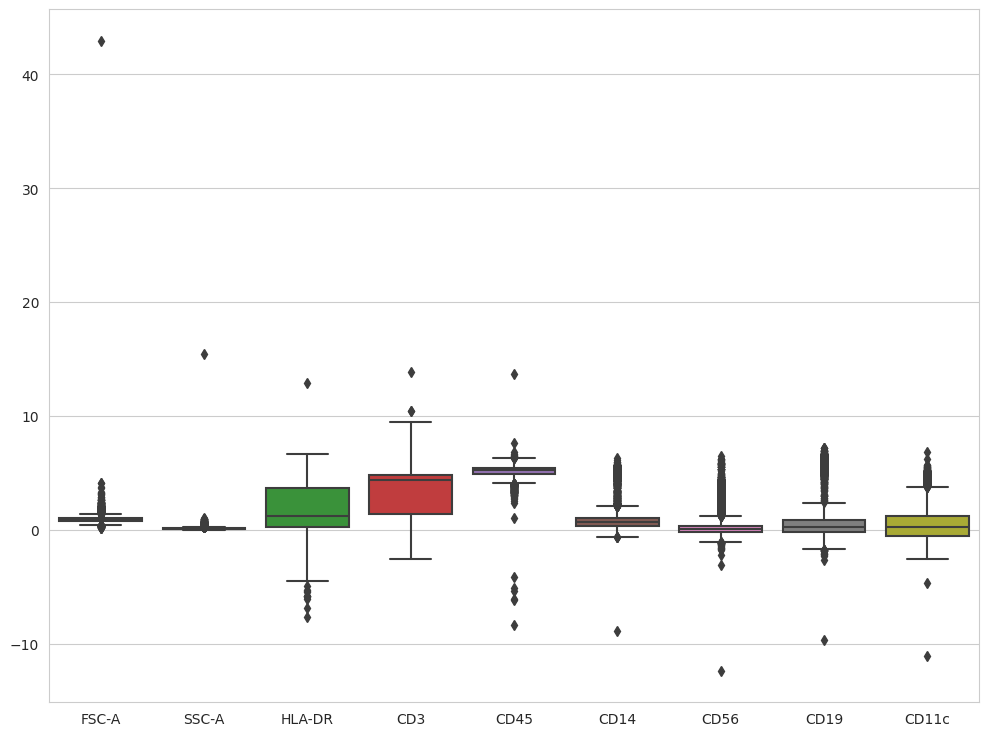

In [ ]:

sns.boxplot(data=fc_data, orient="v")
plt.show()


**✅** Подробрая визуализация. 1.5 балла


#### 2.2. Кластеризация

4.5 балла

При ручной аннотации клеточных типов обычно поступают следующим образом:

1. При помощи методов понижения размерности рисуют наши наблюдения, чтобы примерно оценить число клеточных типов
2. Проводят кластеризацию наблюдений (для некоторых методов нужно заранее задать число кластеров, поэтому нам как раз помогает п.1)
3. Далее мы считаем, что клетки, которые алгоритм отнес к одному кластеру являются одним клеточным типом (если кластеров больше, чем типов клеток, то возможно, что 2 разных кластера являются одним типом)
4. После чего по интенсивности экспрессии поверхностных маркеров мы присваиваем кластеру клеточный тип

Давайте для начала напишем удобную функцию для визуализации наших многомерных данных в пространстве размерностью 2, делать мы это будем при помощи алгоритма t-SNE (при желании можно также воспользоваться UMAP, но для него необходимо устанавливать дополнительную [библиотеку](https://umap-learn.readthedocs.io/en/latest/)).

Поиграться с красивой визуализацией можно [тут](https://distill.pub/2016/misread-tsne/).

In [ ]:
def plot_tsne(data, n_iter=1000,
              perplexity=40, color=None):
    """
    Функция для отрисовки результатов работы t-SNE
        :param data: таблица объекты х признаки
        :param n_iter: число итераций градиентного спуска,
            может быть полезно увеличить, чтобы получить результаты получше
        :param perplexity: число соседей
        :param color: np.array[n_samples] с переменной,
            которой мы хотим покрасить наши наблюдения
        :return tsne_emb: np.array[n_samples, 2] - результаты работы t-SNE
    """

    # Сначала сделаем PCA, так как это хорошее начальное приближение для t-SNE
    # позволит алгоритму быстрее сойтись
    pca = PCA().fit(data)
    pca_embedding = pca.transform(data)


    # Запустим t-SNE, он выдаст нам для каждого объекта по 2 числа,
    # которые мы сможем нарисовать
    tnse = TSNE(n_components=2, init=pca_embedding[:, :2], n_jobs=-1,
                n_iter=n_iter, perplexity=perplexity, random_state=SEED)
    tsne_embedding = tnse.fit_transform(pca_embedding)

    sns.scatterplot(x=tsne_embedding[:, 0],
                    y=tsne_embedding[:, 1],
                    hue=color, palette="colorblind")
    plt.xlabel("$TSNE_1$", fontsize=18)
    plt.ylabel("$TSNE_2$", fontsize=18)

    # Вернем также результаты t-SNE, так как, если потом захотим перестроить картинку,
    # в таком случае нам не придется ждать заново, просто нарисуем новую с готовыми данными

    return tsne_embedding

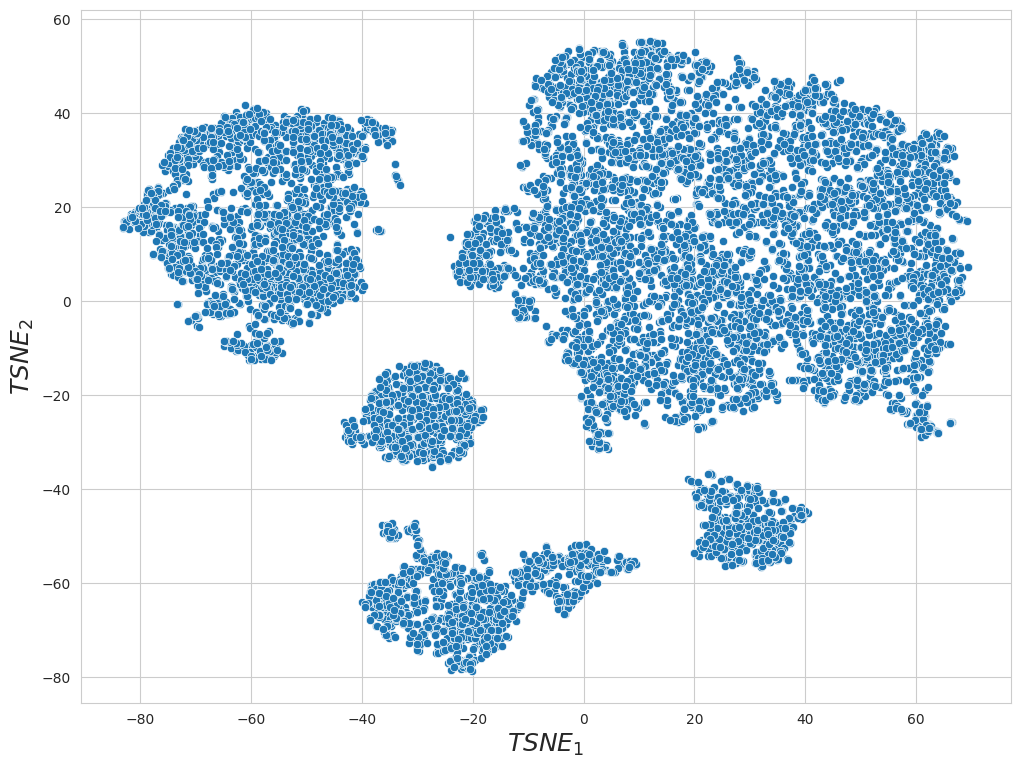

In [ ]:
tsne_embedding_2D = plot_tsne(fc_data)

In [ ]:
def plot_tsne_3D(data, n_iter=1000,
              perplexity=40, color=None):
    """
    Функция для отрисовки результатов работы t-SNE
        :param data: таблица объекты х признаки
        :param n_iter: число итераций градиентного спуска,
            может быть полезно увеличить, чтобы получить результаты получше
        :param perplexity: число соседей
        :param color: np.array[n_samples] с переменной,
            которой мы хотим покрасить наши наблюдения
        :return tsne_emb: np.array[n_samples, 2] - результаты работы t-SNE
    """
    # Сначала сделаем PCA, так как это хорошее начальное приближение для t-SNE
    # позволит алгоритму быстрее сойтись
    pca = PCA().fit(data)
    pca_embedding = pca.transform(data)


    # Запустим t-SNE, он выдаст нам для каждого объекта по 2 числа,
    # которые мы сможем нарисовать
    tnse = TSNE(n_components=3, init=pca_embedding[:, :3], n_jobs=-1,
                n_iter=n_iter, perplexity=perplexity, random_state=SEED)
    tsne_embedding = tnse.fit_transform(pca_embedding)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    ax.set_xlabel("$TSNE_1$", fontsize=18)
    ax.set_ylabel("$TSNE_2$", fontsize=18)
    ax.set_zlabel("$TSNE_3$", fontsize=18)

    ax.scatter(tsne_embedding[:, 0],
               tsne_embedding[:, 1],
               tsne_embedding[:, 2],
               c=color, cmap="Pastel1")

    plt.show()

    # Вернем также результаты t-SNE, так как, если потом захотим перестроить картинку,
    # в таком случае нам не придется ждать заново, просто нарисуем новую с готовыми данными

    return tsne_embedding

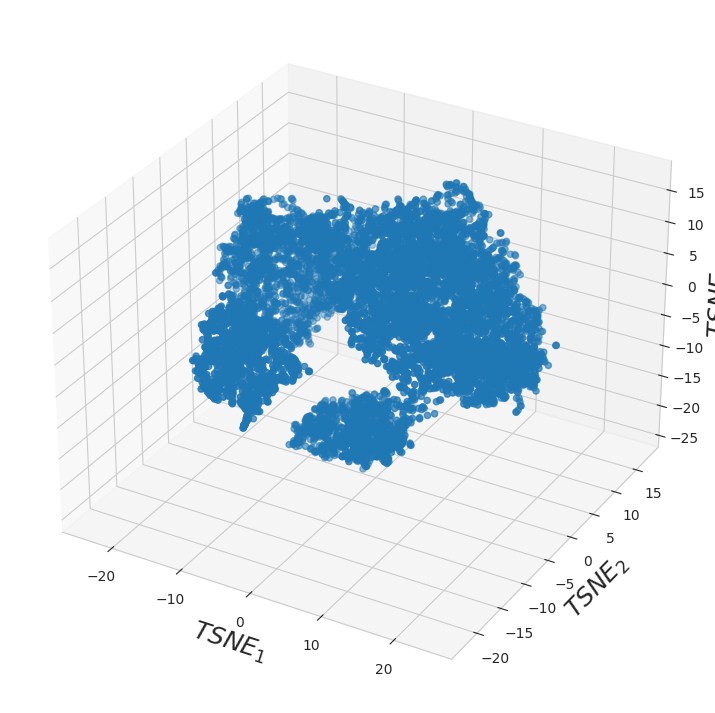

In [ ]:
# %matplotlib notebook - to activate interactive 3D
tsne_embedding_3D = plot_tsne_3D(fc_data)

Кластеризуйте ваши данные:

1. Попробуйте методы кластеризации из тех, что мы прошли
2. Выберите лучший на основании метрики `silhouette_score` (попробуйте также подобрать гиперпараметры)
3. Присвойте каждому наблюдению метку класса и нарисуйте график t-SNE, покрасив точки метками кластера

Например, в случае `KMeans` это можно сделать следующим образом:

## KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=SEED).fit(fc_data)
pred_labels = kmeans.predict(fc_data)

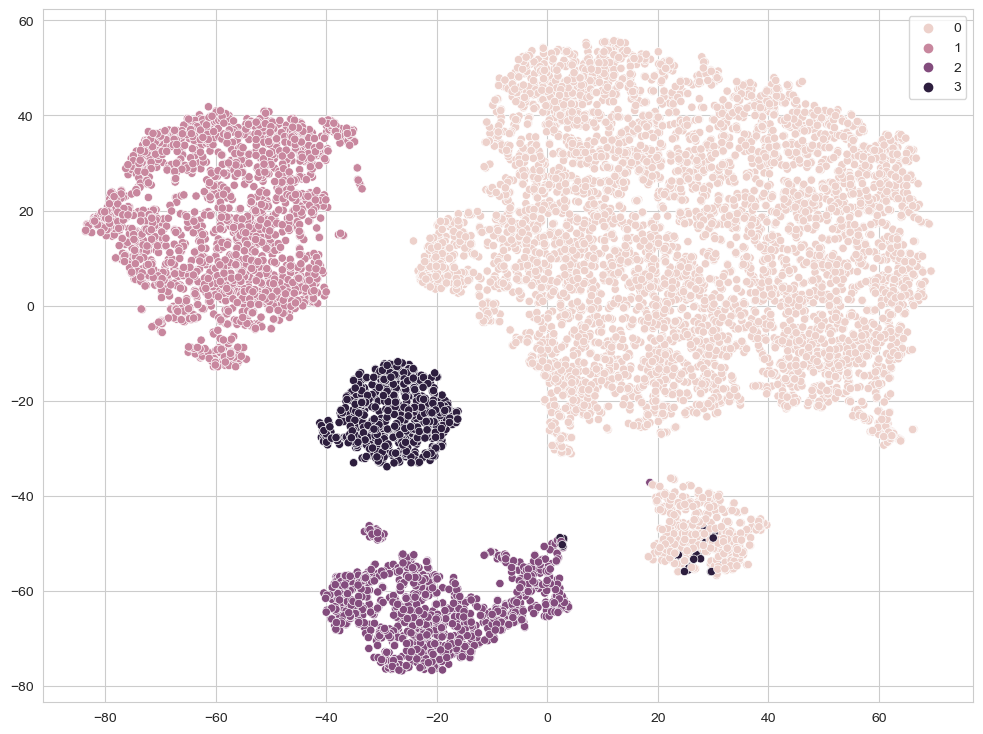

In [ ]:
sns.scatterplot(x=tsne_embedding_2D[:, 0],
                y=tsne_embedding_2D[:, 1],
                hue=pred_labels);

In [ ]:
print(f"Silhouette Score: {silhouette_score(fc_data, pred_labels)}")

Silhouette Score: 0.6103014000983125


Теперь попробуйте другие методы кластеризации, которые мы прошли (или которые вы хотите сами).

Удалось ли вам получить ситуацию, где отдельные группы точек покрашены в один цвет?

In [ ]:
import numpy as np
from sklearn.cluster import SpectralClustering

# Вычисление матрицы схожести на основе данных или другого алгоритма
#similarity_matrix = np.corrcoef(fc_data)

# Создание экземпляра SpectralClustering и задание количества кластеров
n_clusters = 4
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors').fit(fc_data)

# Кластеризация
spectral_labels = spectral.fit_predict(fc_data)

# Вывод результатов
print(spectral_labels)


[3 1 0 ... 2 3 3]


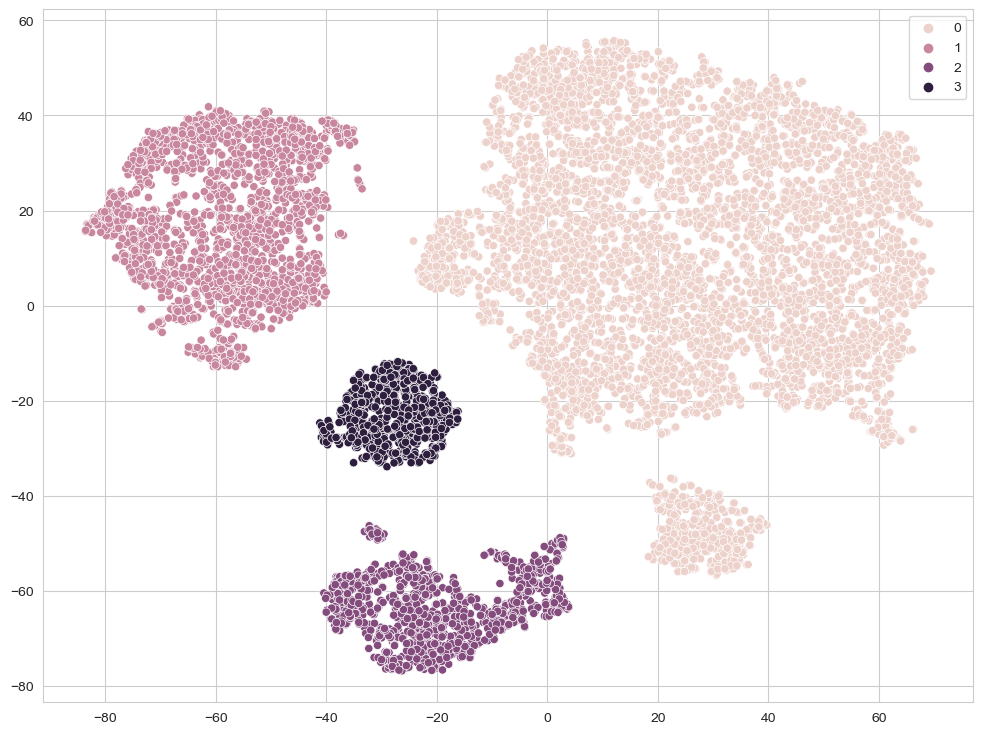

In [ ]:
sns.scatterplot(x=tsne_embedding_2D[:, 0],
                y=tsne_embedding_2D[:, 1],
                hue=spectral_labels);

In [ ]:
print(f"Silhouette Score: {silhouette_score(fc_data, spectral_labels)}")

Silhouette Score: 0.6114468221314616


**✅**Зачет! 4.5 балла, хорошо получилось

#### 2.3. Аннотация клеточных типов

4 балла

Теперь когда мы подобрали хороший алгоритм кластеризации, можно аннотировать наши клетки. Для этого мы нарисуем t-SNE и покрасим точки в зависимости от интенсивности экспрессии поверхностных маркеров. В датасете присутствуют следующие типы клеток:

* B_cells
* T_cells
* Monocytes
* Other cells

Вам нужно будет выяснить, какие клетки экспрессируют определенные маркеры и присвоить каждому кластеру один из типов клеток.

Для начала нарисуем все это безобразие:

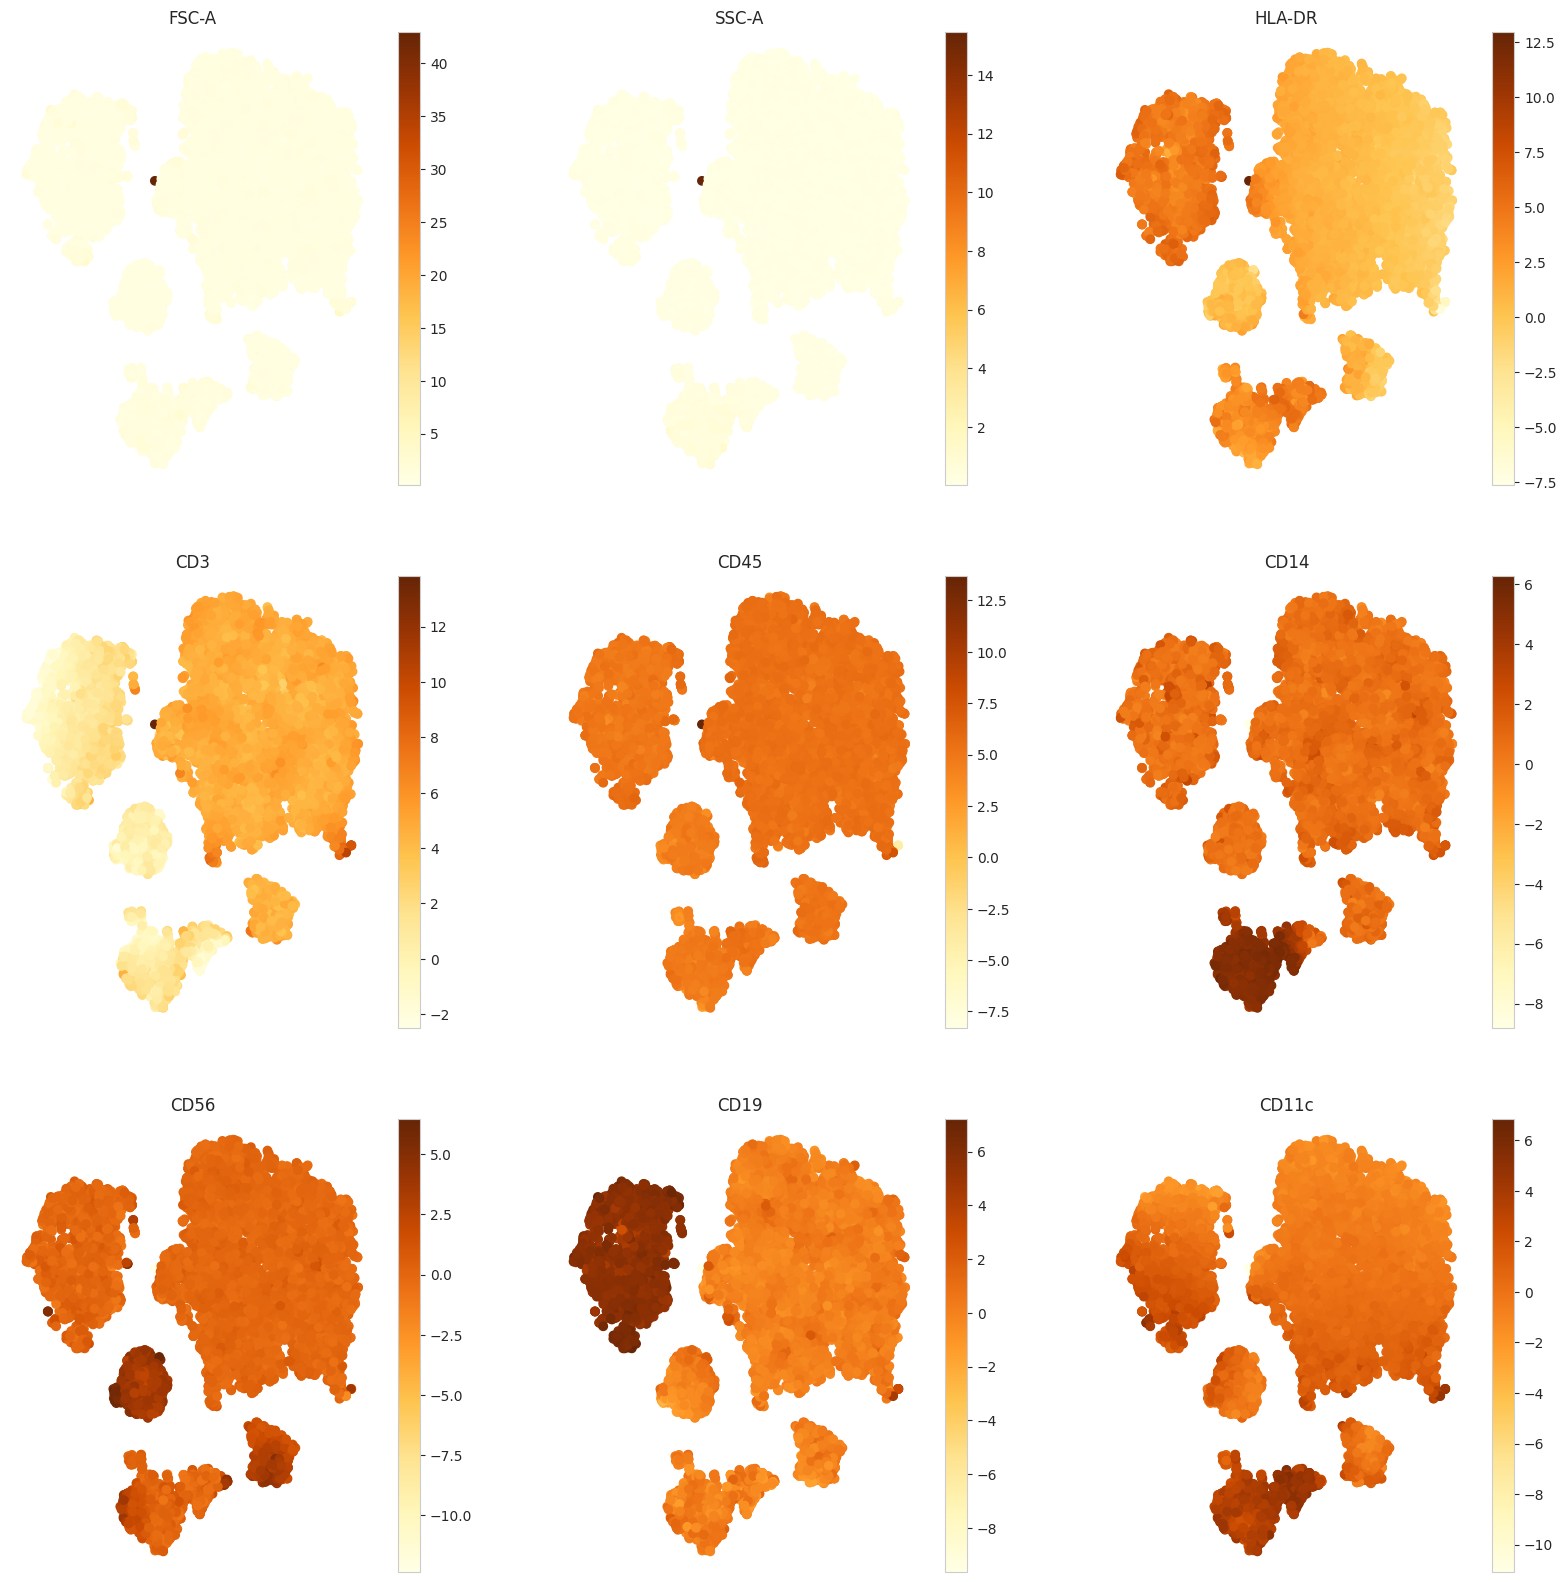

In [ ]:
# Результаты t-SNE уже есть в переменной tsne_res
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for col, ax in zip(fc_data.columns, axes.ravel()):
    scatter = ax.scatter(tsne_embedding_2D[:, 0], tsne_embedding_2D[:, 1],
                         c=fc_data[col], cmap="YlOrBr")
    fig.colorbar(scatter, ax=ax)
    ax.set_title(col)
    ax.grid(False)
    ax.axis("off")

Вам необходимо узнать, какие маркеры характерны для каких типов клеток, и в зависимости от этого проаннотировать кластера.

Дальше дело за вами, нужно определить клеточный тип для каждого кластера и записать их как значения в словаре:

In [ ]:
#cell_type_cluster_map = {0: "YOUR_TURN 1",
#                         1: "YOUR_TURN 2",
#                         2: "YOUR_TURN 3",
#                         3: "YOUR_TURN 4"}

cell_type_cluster_map = {0: "B_cells",
                         1: "T_cells",
                         2: "Monocytes",
                         3: "Other cells"}

In [ ]:
#labels_of_best_clustering = "PUT YOUR LABELS HERE"
labels_of_best_clustering = spectral_labels

In [ ]:
labeled_fc_data = fc_data.assign(Population=labels_of_best_clustering)
labeled_fc_data["Population"] = labeled_fc_data["Population"].map(cell_type_cluster_map)

Посчитайте, как распределены типы клеток:

In [ ]:
labeled_fc_data["Population"].value_counts()

B_cells        6231
T_cells        2035
Monocytes      1099
Other cells     635
Name: Population, dtype: int64

**✅** Хорошо, клетки посчитаны, но неверно определны маркеры (перепутаны для B и Т-клеток)

3 балла

#### 2.4. Атоматическая аннотация

5 баллов

Вам нужно построить классификатор клеточных типов на основе размеченных вами данных. Мы с вами прошли много моделей, поэтому попробуйте как можно больше, а также поразбирайтесь с подбором гиперпараметров.

Подумайте о том, какая стратегия валидации модели здесь подойдет. Не забывайте, что когда вы подбираете гиперпараметры, то лучше это делать на кросс валидации, а также оставлять еще один набор данных в качестве итогового теста.

Оцените качество полученной модели при помощи `f1_score(average="macro")`. Попробуйте его улучшить, каким-то образом поработав с дисбалансом классов ([помощь](https://elitedatascience.com/imbalanced-classes)).

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from itertools import product

X = fc_data
y = spectral_labels

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Подсчет весов классов
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)

# Создание модели Logistic Regression
model = LogisticRegression()

# Параметры модели для настройки
params = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Генерация комбинаций параметров для перебора
def parameter_combinations(params):
    keys = list(params.keys())
    values = list(params.values())
    for combination in product(*values):
        yield dict(zip(keys, combination))

best_f1_score = 0
best_params = None

# Подбор лучших гиперпараметров с использованием кросс-валидации
k = 5  # Количество фолдов для кросс-валидации
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

for param_combination in parameter_combinations(params):
    model.set_params(**param_combination)

    # Кросс-валидация
    f1_scores = cross_val_score(
        model, X_train, y_train, cv=skf, scoring='f1_macro', n_jobs=-1)

    # Усреднение F1-меры по фолдам
    mean_f1_score = np.mean(f1_scores)

    # Если текущая комбинация гиперпараметров лучше предыдущих, сохраняем
    if mean_f1_score > best_f1_score:
        best_f1_score = mean_f1_score
        best_params = param_combination

# Обучение модели с лучшими гиперпараметрами на всем тренировочном наборе
model.set_params(**best_params)
model.fit(X_train, y_train)

# Оценка качества на тестовом наборе
y_pred = model.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')

print("Лучшее значение F1-меры (Macro):", best_f1_score)
print("F1-мера (Macro) на тестовом наборе:", f1_macro)

Лучшее значение F1-меры (Macro): 0.9998980820759471
F1-мера (Macro) на тестовом наборе: 1.0


**✅** Порой для получения достойного или даже лучшего решения не нужно применять очень сложные методы. Так и в данном случае получилось весьма изящное решение с грамотным подбором гиперпараметров и кроссвалидацией. Зачет!

5 баллов

### Задание 3. Любимое место

дополнительно 0.5 балла

Расскажите о вашем любимом месте, куда бы вы хотели съездить этой весной, если вы уже там бывали, то прикрепите фотографию)

Хотелось съездить в теплые места нашей страны (рассматривал прежде всего Дагестан),
но из-за обилия работы, резко возникшего ремонта и пары учебных курсов не смог выбраться:)
Надеюсь, получится в следующем году:)

**✅**

### Therapy time

Напишите здесь ваши впечатления о задании: было ли интересно, было ли слишком легко или наоборот сложно и тд. Также сюда можно написать свои идеи по улучшению заданий, а также предложить данные, на основе которых вы бы хотели построить следующие дз.

**Ваши мысли:**

К сожалению, не хватило практики прежде всего по машинному обучению: очень небольших, но регулярных домашних заданий
по написанию кода, чтобы легче войти в тему. Информация, данная в блокнотах, - это кладезь инсчерпыващей информации и кода,
но тяжело в них разбираться, имея только базовые знания питона.

По лекциям - все супер!


**✅** Вы молодец! Понимаю, что при вхождении в такие темы с базового уровня происходит сильная перегрузка информацией, но при всем этом с заданием справились на ура! Продолжайте практиковаться и изучать материал.Главное делать это понемногу, но непрерывно и тогда успех будет неизбежен.